<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [30]:
mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

# формула для вычисления дисперсии здесь немного другая 1/N*sum(...)
sw1, sl1 = np.var(x_train[y_train == 1], axis=0)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0)

print('МО: ', mw1, ml1, mw_1, ml_1)
print('Дисперсии:', sw1, sl1, sw_1, sl_1)

x = [10, 40]  # длинв, ширина жука
a_1 = lambda x: -(x[0] - ml_1) ** 2 / (2 * sl_1) - (x[1] - mw_1) ** 2 / (2 * sw_1)
a1 = lambda x: -(x[0] - ml1) ** 2 / (2 * sl1) - (x[1] - mw1) ** 2 / (2 * sw1)
y = np.argmax([a_1(x), a1(x)])

print('Номер класса (0 - гусеница, 1 - божья коровка): ', y)

МО:  31.0 35.0 14.4 52.0
Дисперсии: 64.0 40.0 27.439999999999998 146.0
Номер класса (0 - гусеница, 1 - божья коровка):  1


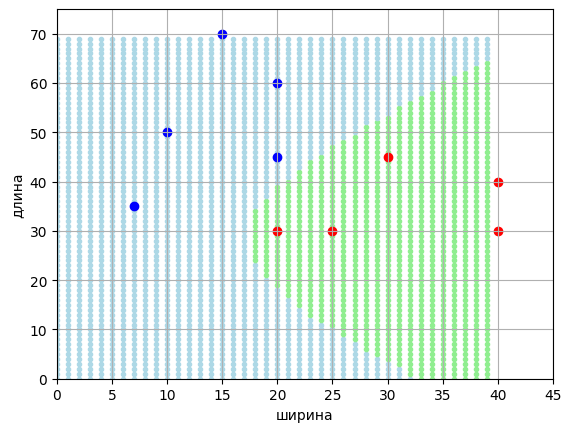

In [35]:
line_x = list(range(max(x_train[:, 0])))
line_y = list(range(max(x_train[:, 1])))
# print(line_x)
# print(line_y)

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

for iy in line_y:
  for ix in line_x:
    x = np.array([iy, ix])
    a1 = lambda x: -(x[0] - ml_1) ** 2 / (2 * sl_1) - (x[1] - mw_1) ** 2 / (2 * sw_1)
    b1 = lambda x: -(x[0] - ml1) ** 2 / (2 * sl1) - (x[1] - mw1) ** 2 / (2 * sw1)
    y1 = np.argmax([a1(x), b1(x)])
    clr = 'lightblue'
    if y1 == 1: clr = 'lightgreen'
    plt.scatter(ix, iy, color=clr, marker='.')

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()